# 数据合并处理

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import scipy as sp


def read_csv_file(f, logging=False):
    data = pd.read_csv(f)
    if logging:
        print(data.head())
        print(data.columns.values)
        print(data.describe())
        print(data.info())
    return data


def categories_process_first_class(cate):
    cate = str(cate)
    return int(cate[0])


def categories_process_second_class(cate):
    cate = str(cate)
    if len(cate) < 3:
        return 0
    else:
        return int(cate[1:])


def age_process(age):
    age = int(age)
    if age == 0:
        return 0
    if age < 16:
        return 1
    if age < 23:
        return 2
    if age < 27:
        return 3
    else:
        return 4


def province_process(hometown):
    hometown = str(hometown)
    if len(hometown) == 1:
        return 0
    else:
        return int(hometown[:-2])


def city_process(hometown):
    hometown = str(hometown)
    if len(hometown) == 1:
        return 0
    else:
        return int(hometown[-2:])


def get_time_day(t):
    t = str(t)
    t = int(t[0:2])
    return t


def get_time_hour(t):
    t = str(t)
    t = int(t[2:4])
    if t < 6:
        return 0
    if t < 12:
        return 1
    if t < 18:
        return 2
    else:
        return 3


def get_time_min(t):
    t = str(t)
    t = int(t[4:])
    return t


def logloss(act, pred):
    epsilon = 1e-5
    pred = sp.maximum(epsilon, pred)
    pred = sp.minimum(1 - eplison, pred)
    ll = sum(act * sp.log(pred) +
             sp.subtract(1, act) * sp.log(sp.subtract(1, pred)))
    ll = ll * -1.0 / len(act)
    return ll

In [3]:
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

print('test dataset')
test_data = read_csv_file('/content/drive/My Drive/CVR预估/test.csv' , logging=True)
print('================================================\n')
print('train dataset:')
train_data = read_csv_file('/content/drive/My Drive/CVR预估/train.csv', logging=True)
print('================================================\n')
print('ad dataset')
ad = read_csv_file('/content/drive/My Drive/CVR预估/ad.csv', logging=True)
print('================================================\n')
print('app dataset')
app_categories = read_csv_file('/content/drive/My Drive/CVR预估/app_categories.csv', logging=True)
print('================================================\n')
print('user dataset')
user = read_csv_file('/content/drive/My Drive/CVR预估/user.csv', logging=True)
print('================================================\n')
print('position dataset')
position = read_csv_file('/content/drive/My Drive/CVR预估/position.csv', logging=True)
print('================================================\n')
print('user_app_actions dataset')
user_app_actions = read_csv_file('/content/drive/My Drive/CVR预估/user_app_actions.csv', logging=True)

test dataset
   instanceID  label  clickTime  ...  positionID  connectionType  telecomsOperator
0           1     -1     310000  ...        3451               1                 3
1           2     -1     310000  ...        1613               1                 3
2           3     -1     310000  ...        5510               2                 1
3           4     -1     310000  ...        4113               2                 3
4           5     -1     310000  ...        3615               1                 3

[5 rows x 8 columns]
['instanceID' 'label' 'clickTime' 'creativeID' 'userID' 'positionID'
 'connectionType' 'telecomsOperator']
          instanceID     label  ...  connectionType  telecomsOperator
count  338489.000000  338489.0  ...   338489.000000     338489.000000
mean   169245.000000      -1.0  ...        1.139015          1.629028
std     97713.501971       0.0  ...        0.511882          0.854993
min         1.000000      -1.0  ...        0.000000          0.000000
25%     84

In [0]:
import pandas_profiling

In [0]:
train = train_data.drop(['label', 'conversionTime'], axis=1)
test = test_data.drop(['label', 'instanceID'], axis=1)
data = pd.concat((train, test), axis=0)

In [5]:
train_data.label.value_counts()

0    3656266
1      93262
Name: label, dtype: int64

In [11]:
print(data.shape)
print(train.shape)
print(test.shape)

(4088017, 6)
(3749528, 6)
(338489, 6)


In [12]:
data.isnull().sum()

clickTime           0
creativeID          0
userID              0
positionID          0
connectionType      0
telecomsOperator    0
dtype: int64

In [6]:
data_ad = data.merge(ad, on='creativeID', how='left')
data_ad.shape

(4088017, 11)

In [7]:
data_ad['click_day'] = data_ad['clickTime'].apply(get_time_day)
data_ad['click_min'] = data_ad['clickTime'].apply(get_time_min)
data_ad['click_hour'] = data_ad['clickTime'].apply(get_time_hour)
data_ad.drop(['clickTime'], inplace=True, axis=1)
data_ad.tail()

,creativeID,userID,positionID,connectionType,telecomsOperator,adID,camgaignID,advertiserID,appID,appPlatform,click_day,click_min,click_hour
4088012,1456,365374,4455,2,1,3379,411,3,465,1,31,59,3
4088013,2962,2231643,4818,1,2,146,138,79,391,1,31,59,3
4088014,4785,1673380,3322,1,3,2871,613,20,328,2,31,59,3
4088015,4432,1303085,4501,0,1,1161,45,3,465,1,31,59,3
4088016,2982,490286,7149,2,1,3379,411,3,465,1,31,59,3


In [0]:
data_ad_app = data_ad.merge(app_categories, on='appID', how='left')
data_ad_app['app_first_categories'] = data_ad_app['appCategory'].apply(
    categories_process_first_class)
data_ad_app['app_second_categories'] = data_ad_app['appCategory'].apply(
    categories_process_second_class)
data_ad_app.drop(['appCategory'], axis=1, inplace=True)

In [0]:
data_ad_app_user = data_ad_app.merge(user, on='userID', how='left')

In [0]:
##test数据集的age数据缺失较多
data_ad_app_user['age'].describe()

data_ad_app_user['age'].replace(
    0.0,
    data_ad_app_user['age'][data_ad_app_user['age'] != 0.0].mean(),
    inplace=True)

data_ad_app_user['age'].fillna(
    data_ad_app_user['age'][data_ad_app_user['age'] != 0.0].mean(),
    inplace=True)
data_ad_app_user['age'].isnull().sum()

In [0]:
data_ad_app_user['age'] = data_ad_app_user['age'].apply(age_process)

In [11]:
data_ad_app_user['residence_province'] = data_ad_app_user['residence'].apply(
    province_process)
data_ad_app_user['residence_city'] = data_ad_app_user['residence'].apply(
    city_process)
data_ad_app_user.drop(['residence'], inplace=True, axis=1)
data_ad_app_user.tail()

,creativeID,userID,positionID,connectionType,telecomsOperator,adID,camgaignID,advertiserID,appID,appPlatform,click_day,click_min,click_hour,app_first_categories,app_second_categories,age,gender,education,marriageStatus,haveBaby,hometown,residence_province,residence_city
4088012,1456,365374,4455,2,1,3379,411,3,465,1,31,59,3,2,9,2,1,1,1,0,1011,10,11
4088013,2962,2231643,4818,1,2,146,138,79,391,1,31,59,3,5,3,0,0,0,0,0,0,0,0
4088014,4785,1673380,3322,1,3,2871,613,20,328,2,31,59,3,1,4,3,1,2,1,0,108,5,3
4088015,4432,1303085,4501,0,1,1161,45,3,465,1,31,59,3,2,9,2,2,3,0,0,204,2,4
4088016,2982,490286,7149,2,1,3379,411,3,465,1,31,59,3,2,9,2,2,1,0,1,1002,10,9


In [0]:
data_ad_app_user_position = data_ad_app_user.merge(position,  on='positionID', how='left')

In [0]:
import pandas_profiling

In [0]:
#x_train.profile_report(style = {'full_width': True})

In [0]:
x_train = data_ad_app_user_position[:3749528]
y_train = train_data['label']
test = data_ad_app_user_position[3749528:]

In [0]:
import pickle
with open('/content/drive/My Drive/CVR预估/values.pkl', 'wb') as f:
    pickle.dump(x_train, f)
    pickle.dump(y_train, f)
    pickle.dump(test, f)

# 数据建模

## 导入数据

In [0]:
import pickle
with open('values.pkl', 'rb') as f:
    x_train = pickle.load(f)
    y_train = pickle.load(f)
    test = pickle.load(f)

In [0]:
y_train.value_counts()
##正负样本非常不均衡，但由于过采样后数据量过大，电脑内存有限，使用欠采样的方法

In [0]:
df_train = x_train.copy()
df_train['label'] = y_train

In [0]:
import cufflinks as cf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

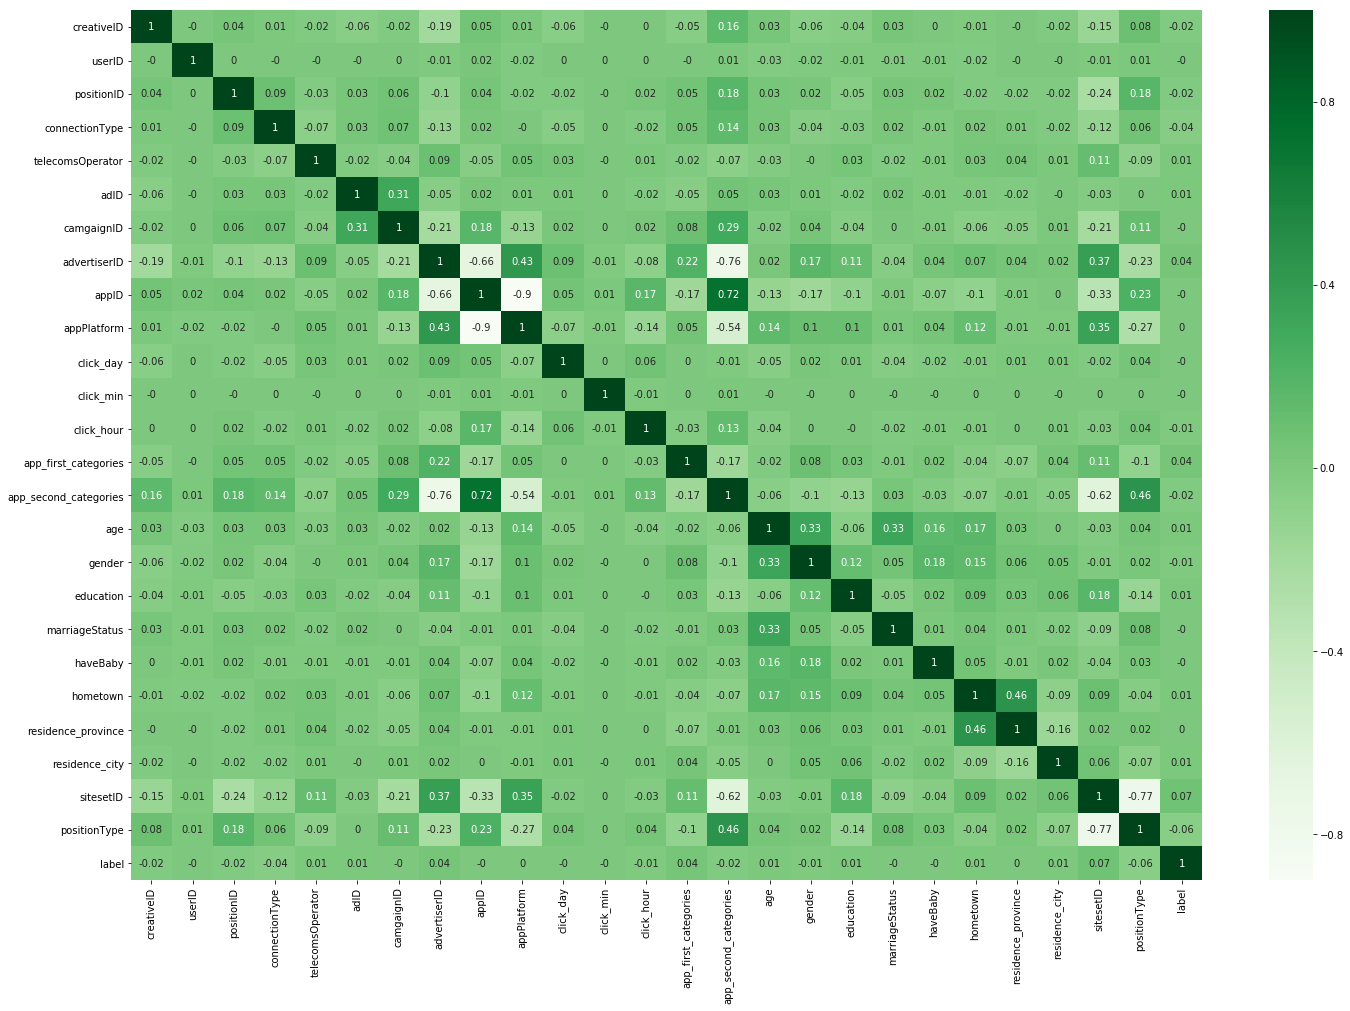

In [17]:
plt.figure(figsize = (24, 16))
sns.heatmap(df_train.corr().round(2), annot = True, cmap = 'Greens')

## 过采样后存储数据

In [0]:
from imblearn.over_sampling import ADASYN

x_train_oversam, y_train_oversam = ADASYN().fit_sample(x_train, y_train)

In [0]:
import pickle
with open('values_resam.pkl', 'wb') as f:
    pickle.dump(x_train_oversam, f)
    pickle.dump(y_train_oversam, f)

In [0]:
print(x_train_oversam.shape)
print(y_train_oversam.shape)

In [0]:
## EasyEnsemble
'''
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

bbc = BalancedBaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    ratio = 'auto',
    replacement = False,
    random_state = 100,
    n_jobs = -1
)'''
'''
kf = KFold(n_splits = 5)
for train_index, val_index in kf.split(x_train, y_train):
    X_train,Y_train = x_train[train_index, : ], y_train[train_index]
    X_val, Y_val = x_train[val_index, : ], y_train[val_index]
    bbc.fit(X_train, Y_train)
    pred_bbc = bbc.predict_proba(X_val)
    print(pred_bbc)
    print('The logloss is ', logloss(Y_val, pred_bbc))
'''

## 欠采样并存储数据

In [0]:
import numpy as np
import pickle

with open('/content/drive/My Drive/CVR预估/values.pkl', 'rb') as f:
    x_train = pickle.load(f)
    y_train = pickle.load(f)
    test = pickle.load(f)

#x_train = np.array(x_train)
#y_train = np.array(y_train)
#test = np.array(test)

In [18]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(version = 3, random_state=100, n_jobs = -1)
x_train_resam, y_train_resam = nm.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [19]:
x_train_resam

array([[   1166,  798666,    7502, ...,       1,       0,       1],
       [     58, 1279663,    7434, ...,       5,       0,       1],
       [    742,   62544,    7619, ...,       3,       1,       0],
       ...,
       [   1675, 1445513,    2188, ...,       1,       0,       1],
       [   4077, 1252796,    5539, ...,       0,       1,       0],
       [   2038, 2216718,    1865, ...,       6,       0,       2]])

In [0]:
x_train_resam = pd.DataFrame(x_train_resam, columns=x_train.columns)
y_train_resam = pd.DataFrame(y_train_resam, columns=['label'])
print(x_train_resam)

In [0]:
with open('/content/drive/My Drive/CVR预估/values_undersampling.pkl', 'wb') as f:
    pickle.dump(x_train_resam, f)
    pickle.dump(y_train_resam, f)
    pickle.dump(test, f)

## 载入数据

In [0]:
import pickle

with open('/content/drive/My Drive/CVR预估/values_undersampling.pkl', 'rb') as f:
    x_train_resam = pickle.load(f)
    y_train_resam = pickle.load(f)
    test = pickle.load(f)

FileNotFoundError: ignored

### Xgbosst

#### 用sklearn API

In [0]:
'''
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'max_depth': [3, 4, 5, 8, 10],
    'n_estimators': [50, 100, 200, 400, 600, 800, 1000],
    'laerning_rate': [0.1, 0.2, 0.3],
    'gamma': [0, 0.2],
    'subsample': [0.8, 1],
             }

xgb_model = xgb.XGBClassifier()
rgs = GridSearchCV(xgb_model, param_grid, n_jobs = -1, cv = 5)
rgs.fit(x_train_resam, y_train_resam)
print(rgs.best_score_)
print(rgs.best_params_)
pred = rgs.predict_proba(test)
print('The logloss is ', logloss(Y_val, pred_bbc))
'''

#### 用Python API

In [0]:
'''
import xgboost as xgb

dtrain = xgb.DMatrix(x_train_resam, label = y_train_resam)
num_xgb = 500

params = {
    'booster': 'gbtree',
    'eta': 0.2, 
    'eval_metric': 'logloss',
    'tree method': 'auto',
    'objective': 'binary:logistic'
}

bst = xgb.cv(params, dtrain, num_xgb, nfold = 5, verbose_eval = True)

dtest = xgb.DMatrix(test)
pred = bst.predict(dtest)
print(logloss()
'''

### LightGBM

In [0]:
import pickle

with open('lgb_values.pkl', 'rb') as f:
    x_train_resam = pickle.load(f)
    y_train_resam = pickle.load(f)
    test = pickle.load(f)

In [0]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [0]:
'''
X_train, X_val, y_train, y_val = train_test_split(x_train_resam,
                                                  y_train_resam,
                                                  test_size=0.2)
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 3,
    'max_depth': 10,
    'min_data_in_leaf': 40,
    'learning_rate': 0.5,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l2': 0.001,
    'verbose': 1
}

lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=2000,
                verbose_eval=True,
                valid_sets=lgb_val,
                early_stopping_rounds=None)
pred = gbm.predict(test, num_iteration=gbm.best_iteration)

importance = gbm.feature_importance()
names = gbm.feature_name()
for idx, im in sorted(enumerate(importance), key=lambda x: x[1], reverse=True):
    print('The score of {} is {}'.format(names[idx], im))

### DeepFM

In [0]:
x_train_resam.drop('hometown', axis = 1, inplace = True)

In [27]:
x_train_resam.head()

,creativeID,userID,positionID,connectionType,telecomsOperator,adID,camgaignID,advertiserID,appID,appPlatform,click_day,click_min,click_hour,app_first_categories,app_second_categories,age,gender,education,marriageStatus,haveBaby,residence_province,residence_city,sitesetID,positionType
0,1166,798666,7502,1,2,2985,6,80,14,2,26,33,0,2,0,0,1,0,2,0,26,1,0,1
1,58,1279663,7434,1,1,913,217,44,421,1,25,24,2,1,4,4,1,2,2,0,20,5,0,1
2,742,62544,7619,1,2,312,431,91,84,2,21,39,3,4,2,2,1,3,0,0,21,3,1,0
3,1465,1637212,7619,1,0,3141,277,74,100,2,26,24,0,3,1,2,2,4,1,0,33,1,1,0
4,32,838339,7052,1,2,34,85,80,14,2,26,1,2,2,0,1,2,0,0,1,21,3,0,1


In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()

x_train_resam_le = x_train_resam.copy()
for col in x_train_resam.columns:
    x_train_resam_le[col] = le.fit_transform(x_train_resam[col])

#### 加载数据

In [0]:
import pickle

with open('lgb_values.pkl', 'rb') as f:
    x_train_resam = pickle.load(f)
    y_train_resam = pickle.load(f)
    test = pickle.load(f)

In [0]:
x_train_resam.columns

#### 处理数据

In [0]:
feature_dict = {}
total_feature = 0

for col in x_train_resam_le.columns:
    unique_val = x_train_resam_le[col].unique()
    feature_dict[col] = dict(zip(unique_val, range(total_feature, total_feature + len(unique_val))))
    total_feature += len(unique_val)

feature_value = x_train_resam_le.copy()
feature_index = x_train_resam_le.copy()

for col in x_train_resam_le.columns:
    feature_value[col] = 1
    feature_index[col] = feature_index[col].map(feature_dict[col])

#### 定义参数

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd

dfm_params = {
    'use_fm': True,
    'use_deep': True,
    'embedding_size': 8,
    'dropout_fm': [1.0, 1.0],
    'deep_layers': [32, 32],
    'dropout_deep': [0.5, 0.5, 0.5],
    'deep_layer_activation': tf.nn.relu,
    'opoch': 30,
    'bach_size': 1024,
    'learning_rate': 0.001,
    'optimizer': 'adam',
    'batch_norm_dacay': 0.995,
    'l2_reg': 0.01,
    'verbose': True,
    'eval_metric': 'logloss',
    'random_seed': 100
}
dfm_params['feature_size'] = total_feature
dfm_params['field_size'] = len(x_train_resam.columns)

with tf.device('/gpu:0'):
    feat_index = tf.placeholder(tf.int32, shape = [None, None], name = 'feat_index')
    feat_value = tf.placeholder(tf.float32, shape = [None, None], name = 'feat_value')

    label = tf.placeholder(tf.float32, shape = [None, 1], name = 'label')

    weights = dict()

    ##embeddings
    weights['feature_embeddings'] = tf.Variable(
        tf.random_normal([dfm_params['feature_size'], dfm_params['embedding_size']], 0.0, 0.01), name = 'feature_embeddings')
    weights['feature_bias'] = tf.Variable(
        tf.random_normal([dfm_params['feature_size'], 1], 0.0, 0.01), name = 'feature_bias')###weights[''feature_bias]是一次项的权重

    ##deep layers
    num_layer = len(dfm_params['deep_layers'])
    input_size = dfm_params['field_size'] * dfm_params['embedding_size']
    glorot = np.sqrt(2.0 / (input_size + dfm_params['deep_layers'][0]))

    weights['layer_0'] = tf.Variable(
        np.random.normal(loc = 0, scale = glorot, size = (input_size, dfm_params['deep_layers'][0])), dtype = np.float32)
    weights['bias_0'] = tf.Variable(
        np.random.normal(loc = 0, scale = glorot, size = (1, dfm_params['deep_layers'][0])), dtype = np.float32)

    for i in range(1, num_layer):
        glorot = np.sqrt(2.0 / (dfm_params['deep_layers'][i - 1] + dfm_params['deep_layers'][i]))
        weights['layer_%d'%(i)] = tf.Variable(
            np.random.normal(loc = 0, scale = glorot, size = (dfm_params['deep_layers'][i - 1], dfm_params['deep_layers'][i])), dtype = np.float32)
        weights['bias_%d'%(i)] = tf.Variable(
            np.random.normal(loc = 0, scale = glorot, size = (1, dfm_params['deep_layers'][i])), dtype = np.float32)

    ##concat layer
    if dfm_params['use_fm'] and dfm_params['use_deep']:
        input_size = dfm_params['field_size'] + dfm_params['embedding_size'] + dfm_params['deep_layers'][-1]
    elif dfm_params['use_fm']:
        input_size = dfm_params['field_size'] + dfm_params['embedding_size']
    else:    
        input_size = dfm_params['deep_layers'][-1]

    glorot = np.sqrt(2.0 / (input_size + 1))
    weights['concat_projection'] = tf.Variable(np.random.normal(loc = 0, scale = glorot, size = [input_size, 1]), dtype = np.float32)
    weights['concat_bias'] = tf.Variable(tf.constant(0.01), dtype = np.float32)

#### 构造模型

In [36]:
with tf.device('/gpu:0'):
##embeddings
    embeddings = tf.nn.embedding_lookup(weights['feature_embeddings'], feat_index)
    reshaped_feat_value = tf.reshape(feat_value, shape = [-1, dfm_params['field_size'], 1])
    print(reshaped_feat_value)
    embeddings = tf.multiply(embeddings, reshaped_feat_value)

    ##fm
    fm_first_order = tf.nn.embedding_lookup(weights['feature_bias'], feat_index)
    fm_first_order = tf.reduce_sum(tf.multiply(fm_first_order, reshaped_feat_value), 2)

    summed_features_emb = tf.reduce_sum(embeddings, 1)
    summed_features_emb_square = tf.square(summed_features_emb)

    squared_features_emb = tf.square(embeddings)
    squared_features_emb_sum = tf.reduce_sum(squared_features_emb, 1)

    fm_second_order = 0.5 * tf.subtract(summed_features_emb_square, squared_features_emb_sum)

    ##deep
    y_deep = tf.reshape(embeddings, 
                        shape = [-1, dfm_params['field_size'] * dfm_params['embedding_size']])

    for i in range(len(dfm_params['deep_layers'])):
        y_deep = tf.add(tf.matmul(y_deep, weights['layer_%d'%(i)]), weights['bias_%d'%(i)])
        y_deep = tf.nn.relu(y_deep)

    ##final layer
    if dfm_params['use_fm'] and dfm_params['use_deep']:
        concat_input = tf.concat([fm_first_order, fm_second_order, y_deep], axis = 1)
    elif dfm_params['use_fm']:
        concat_input = tf.concat([fm_first_order, fm_second_order], axis = 1)
    else:
        concat_input = y_deep

    out = tf.nn.sigmoid(tf.add(tf.matmul(concat_input, 
                                         weights['concat_projection']), weights['concat_bias']))

    loss = tf.losses.log_loss(tf.reshape(label, (-1,1)), out)
    optimizer = tf.train.AdamOptimizer(learning_rate = dfm_params['learning_rate'], 
                                       beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8).minimize(loss)

W0817 12:59:21.914329 140527914383232 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/losses/losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Tensor("Reshape:0", shape=(?, 24, 1), dtype=float32, device=/device:GPU:0)


#### 训练模型

In [37]:
with tf.Session(config = tf.ConfigProto(log_device_placement = True)) as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(200):
        epoch_loss,_ =sess.run([loss, optimizer], feed_dict = {feat_index: feature_index, feat_value: feature_value, label: y_train_resam})
        print('epoch%s ,loss is %s'%(str(i), str(epoch_loss)))

epoch0 ,loss is 0.6929392
epoch1 ,loss is 0.69185615
epoch2 ,loss is 0.6907495
epoch3 ,loss is 0.6895949
epoch4 ,loss is 0.6883683
epoch5 ,loss is 0.68705136
epoch6 ,loss is 0.6856307
epoch7 ,loss is 0.68409324
epoch8 ,loss is 0.6824249
epoch9 ,loss is 0.6806135
epoch10 ,loss is 0.6786515
epoch11 ,loss is 0.6765321
epoch12 ,loss is 0.6742456
epoch13 ,loss is 0.67178434
epoch14 ,loss is 0.6691486
epoch15 ,loss is 0.6663552
epoch16 ,loss is 0.66344017
epoch17 ,loss is 0.66045135
epoch18 ,loss is 0.6574107
epoch19 ,loss is 0.65431
epoch20 ,loss is 0.65113974
epoch21 ,loss is 0.64789015
epoch22 ,loss is 0.64453524
epoch23 ,loss is 0.6410576
epoch24 ,loss is 0.63746524
epoch25 ,loss is 0.6337595
epoch26 ,loss is 0.6299179
epoch27 ,loss is 0.62591314
epoch28 ,loss is 0.6217235
epoch29 ,loss is 0.61733264
epoch30 ,loss is 0.61273307
epoch31 ,loss is 0.60791594
epoch32 ,loss is 0.60286343
epoch33 ,loss is 0.5975561
epoch34 ,loss is 0.59198254
epoch35 ,loss is 0.58613145
epoch36 ,loss is 0.5799